In [9]:
import os
import time
import requests
import sys
from bs4 import BeautifulSoup
from selenium import webdriver
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# This part of code can be used to store html data of the scrapped pages 

def retrieve_html():
    for year in range(2013,2019):
        for month in range(1,13):
            if(month<10):
                url='https://en.tutiempo.net/climate/0{}-{}/ws-432950.html'.format(month,year)
            else:
                url='https://en.tutiempo.net/climate/{}-{}/ws-432950.html'.format(month,year)
            texts=requests.get(url)
            text_utf=texts.text.encode('utf=8')
        
            if not os.path.exists("C:/Users/DELL/Desktop/AQI/Data/Html_Data/{}".format(year)):
                os.makedirs("C:/Users/DELL/Desktop/AQI/Data/Html_Data/{}".format(year))
            with open("C:/Users/DELL/Desktop/AQI/Data/Html_Data/{}/{}.html".format(year,month),"wb") as output:
                output.write(text_utf)
        
        sys.stdout.flush()
        
if __name__=="__main__":
    start_time=time.time()
    retrieve_html()
    stop_time=time.time()
    print("Time taken {}".format(stop_time-start_time))

Time taken 69.1613519191742


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'C:\\Users\\DELL\\Desktop\\Projects\\latest'

In [5]:
file_name='aqi201{}.csv'
dic={}
for y in range(3,6):
    year='201'+str(y)
    average=[]
    file=file_name.format(y)
    for rows in pd.read_csv(file,chunksize=24): # for 24 hours of a day
        add_var=0
        avg=0.0
        data=[]
        for index,row in rows.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld': #if there are numericals in string form
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        
        average.append(avg)
        dic[year]=average

In [10]:
dic['2013'][:5]

[284.79583333333335, 219.72083333333333, 182.1875, 115.28749999999998, 0.0]

In [6]:
z=0
for i in dic:
    z=z+len(dic[i]) 

In [7]:
z

1095

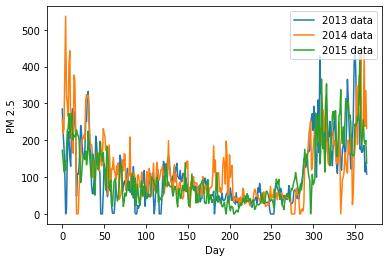

In [11]:
plt.plot(range(0,365),dic['2013'],label="2013 data")
plt.plot(range(0,365),dic['2014'],label="2014 data")
plt.plot(range(0,365),dic['2015'],label="2015 data")
plt.xlabel('Day')
plt.ylabel('PM 2.5')
plt.legend(loc='upper right')
plt.show()

In [15]:
cd ..

C:\Users\DELL\Desktop\Projects\AQI\Data


In [16]:
cd ..

C:\Users\DELL\Desktop\Projects\AQI


master_dic={}
browser=webdriver.Firefox()
for year in range(2013,2016):
    day=[]
    t=[]
    tmx=[]
    tmi=[]
    h=[]
    vv=[]
    v=[]
    vm=[]
    slp=[]
    pp=[]
    for month in range(1,13):
        try:
            if(month<10):
                url='https://en.tutiempo.net/climate/0{}-{}/ws-432950.html'.format(month,year)
            else:
                url='https://en.tutiempo.net/climate/{}-{}/ws-432950.html'.format(month,year)
  
            
            browser.get(url)
            html=browser.page_source
            soup=BeautifulSoup(html,'html.parser')
            table=soup.find_all('table',class_="medias mensuales numspan")

            for row in table[0].find_all('tr')[1:-2]:
                data1=row.find_all('td')
                day=day+[data1[0].text.strip()]
                try:
                    t=t+[float(data1[1].text.strip())]
                except:
                    t=t+[data1[1].text.strip()]
                try:
                    tmx=tmx+[float(data1[2].text.strip())]
                except:
                    tmx=tmx+[data1[2].text.strip()]
                try:
                    tmi=tmi+[float(data1[3].text.strip())]
                except:
                    tmi=tmi+[data1[3].text.strip()]
                try:
                    slp=slp+[float(data1[4].text.strip())]
                except:
                    slp=slp+[data1[4].text.strip()]
                try:
                    h=h+[float(data1[5].text.strip())]
                except:
                    h=h+[data1[5].text.strip()]
                try:
                    pp=pp+[float(data1[6].text.strip())]
                except:
                    pp=pp+[data1[6].text.strip()]
                try:
                    vv=vv+[float(data1[7].text.strip())]
                except:
                    vv=vv+[data1[7].text.strip()]
                try:
                    v=v+[float(data1[8].text.strip())]
                except:
                    v=v+[data1[8].text.strip()]
                try:
                    vm=vm+[float(data1[9].text.strip())]
                except:
                    vm=vm+[data1[9].text.strip()]
        except:
            break
    master_dic[year]=pd.DataFrame({'T':t,'TM':tmx,
                                   'Tm':tmi,'SLP':slp,'H':h,
                                   'VV':vv,'V':v,'VM':vm}) 

In [15]:
master_dic={}
browser=webdriver.Firefox()
for year in range(2013,2016):
    day=[]
    t=[]
    tmx=[]
    tmi=[]
    h=[]
    vv=[]
    v=[]
    vm=[]
    slp=[]
    pp=[]
    for month in range(1,13):
        try:
            if(month<10):
                url='https://en.tutiempo.net/climate/0{}-{}/ws-432950.html'.format(month,year)
            else:
                url='https://en.tutiempo.net/climate/{}-{}/ws-432950.html'.format(month,year)
  
            
            browser.get(url)
            html=browser.page_source
            soup=BeautifulSoup(html,'html.parser')
            table=soup.find_all('table',class_="medias mensuales numspan")

            for row in table[0].find_all('tr')[1:-2]:
                data1=row.find_all('td')
                day=day+[data1[0].text.strip()]
                try:
                    t=t+[float(data1[1].text.strip())]
                except:
                    t=t+[data1[1].text.strip()]
                try:
                    tmx=tmx+[float(data1[2].text.strip())]
                except:
                    tmx=tmx+[data1[2].text.strip()]
                try:
                    tmi=tmi+[float(data1[3].text.strip())]
                except:
                    tmi=tmi+[data1[3].text.strip()]
                try:
                    slp=slp+[float(data1[4].text.strip())]
                except:
                    slp=slp+[data1[4].text.strip()]
                try:
                    h=h+[float(data1[5].text.strip())]
                except:
                    h=h+[data1[5].text.strip()]

                try:
                    vv=vv+[float(data1[7].text.strip())]
                except:
                    vv=vv+[data1[7].text.strip()]
                try:
                    v=v+[float(data1[8].text.strip())]
                except:
                    v=v+[data1[8].text.strip()]
                try:
                    vm=vm+[float(data1[9].text.strip())]
                except:
                    vm=vm+[data1[9].text.strip()]
        except:
            break
    master_dic[year]=pd.DataFrame({'T':t,'TM':tmx,
                                   'Tm':tmi,'SLP':slp,'H':h,
                                   'VV':vv,'V':v,'VM':vm}) 

In [16]:
final_df_x=pd.DataFrame(columns=['T','TM',
                                   'Tm','SLP','H',
                                 'VV','V','VM'])

In [17]:
for year in range(2013,2016):
    final_df_x=pd.concat([final_df_x,master_dic[year]],ignore_index=True)

In [18]:
final_df_x

,T,TM,Tm,SLP,H,VV,V,VM
0,23.4,30.3,19,-,59,6.3,4.3,5.4
1,22.4,30.3,16.9,-,57,6.9,3.3,7.6
2,24,31.8,16.9,-,51,6.9,2.8,5.4
3,,,,,,,,
4,,,,,,,,
...,...,...,...,...,...,...,...,...
1090,21.8,27.7,17.9,-,72,5.3,2.8,5.4
1091,,,,,,,,
1092,,,,,,,,
1093,,,,,,,,


In [19]:
ls=[]
for year in range(2013,2016):
    for val in dic[str(year)]:
        ls=ls+[float(val)]

In [91]:
#pd.DataFrame(ls).to_csv('x.csv')

In [20]:
len(ls)

1095

In [21]:
final_df_x.to_csv('final_df_x.csv')

In [22]:
for year in range(2013,2016):
    print(len(master_dic[year]),len(dic[str(year)]))

365 365
365 365
365 365


ls=[]
for year in range(2013,2019):
    for i in range(len(master_dic[year])):
        try:
            ls=ls+[dic[str(year)][i]]
        except:
            ls=ls+[np.average(dic[str(year)])]

In [23]:
len(ls)

1095

In [24]:
final_df_x['PM2.5']=ls

In [25]:
final_df_x

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,23.4,30.3,19,-,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,-,57,6.9,3.3,7.6,219.720833
2,24,31.8,16.9,-,51,6.9,2.8,5.4,182.187500
3,,,,,,,,,115.287500
4,,,,,,,,,0.000000
...,...,...,...,...,...,...,...,...,...
1090,21.8,27.7,17.9,-,72,5.3,2.8,5.4,255.333333
1091,,,,,,,,,199.916667
1092,,,,,,,,,190.500000
1093,,,,,,,,,199.583333


In [26]:
final_df_x.iloc[3][0]==''

True

ls1=[]
for k in range(len(final_df_x)):
    flg=0
    for i in final_df_x.iloc[k]:
        if i=='' or i=='-' or i=='None':
            flg=1
            break:
    ls1=ls1+[flg]

In [27]:
ls1=[]
for k in range(len(final_df_x)):
    flg=0
    if final_df_x.iloc[k][0]=='':
        flg=1

    ls1=ls1+[flg]

In [28]:
final_df_x['Flag']=ls1

In [29]:
final_df_x

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5,Flag
0,23.4,30.3,19,-,59,6.3,4.3,5.4,284.795833,0
1,22.4,30.3,16.9,-,57,6.9,3.3,7.6,219.720833,0
2,24,31.8,16.9,-,51,6.9,2.8,5.4,182.187500,0
3,,,,,,,,,115.287500,1
4,,,,,,,,,0.000000,1
...,...,...,...,...,...,...,...,...,...,...
1090,21.8,27.7,17.9,-,72,5.3,2.8,5.4,255.333333,0
1091,,,,,,,,,199.916667,1
1092,,,,,,,,,190.500000,1
1093,,,,,,,,,199.583333,1


In [30]:
Final_DF=final_df_x[final_df_x['Flag']==0]

In [31]:
Final_DF.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5,Flag
0,23.4,30.3,19,-,59,6.3,4.3,5.4,284.795833,0
1,22.4,30.3,16.9,-,57,6.9,3.3,7.6,219.720833,0
2,24,31.8,16.9,-,51,6.9,2.8,5.4,182.187500,0
6,22.8,30.2,17.6,-,55,7.7,3.7,7.6,154.037500,0
7,23.1,30.6,17.4,-,46,6.9,3.3,5.4,223.208333,0


In [32]:
Final_DF.dtypes

T         object
TM        object
Tm        object
SLP       object
H         object
VV        object
V         object
VM        object
PM2.5    float64
Flag       int64
dtype: object

In [33]:
Final_DF.shape

(561, 10)

In [34]:
Final_DF = Final_DF.apply(pd.to_numeric, errors='coerce')

In [35]:
Final_DF.dtypes

T        float64
TM       float64
Tm       float64
SLP      float64
H        float64
VV       float64
V        float64
VM       float64
PM2.5    float64
Flag       int64
dtype: object

In [36]:
Final_DF.isnull().sum()

T          3
TM         3
Tm         3
SLP      561
H          3
VV         3
V          3
VM         9
PM2.5      0
Flag       0
dtype: int64

In [37]:
Final_DF=Final_DF.reset_index().drop(['index','Flag','SLP'],axis=1)

In [38]:
Final_DF.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [39]:
Final_DF.shape

(561, 8)

In [40]:
Final_DF.isnull().sum()

T        3
TM       3
Tm       3
H        3
VV       3
V        3
VM       9
PM2.5    0
dtype: int64

In [41]:
Final_DF.dropna(axis=0,inplace=True)

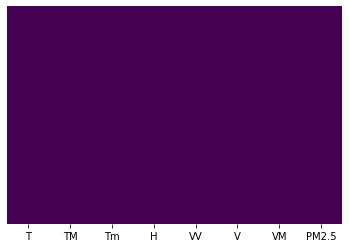

In [42]:
sns.heatmap(Final_DF.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
Final_DF.isnull().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

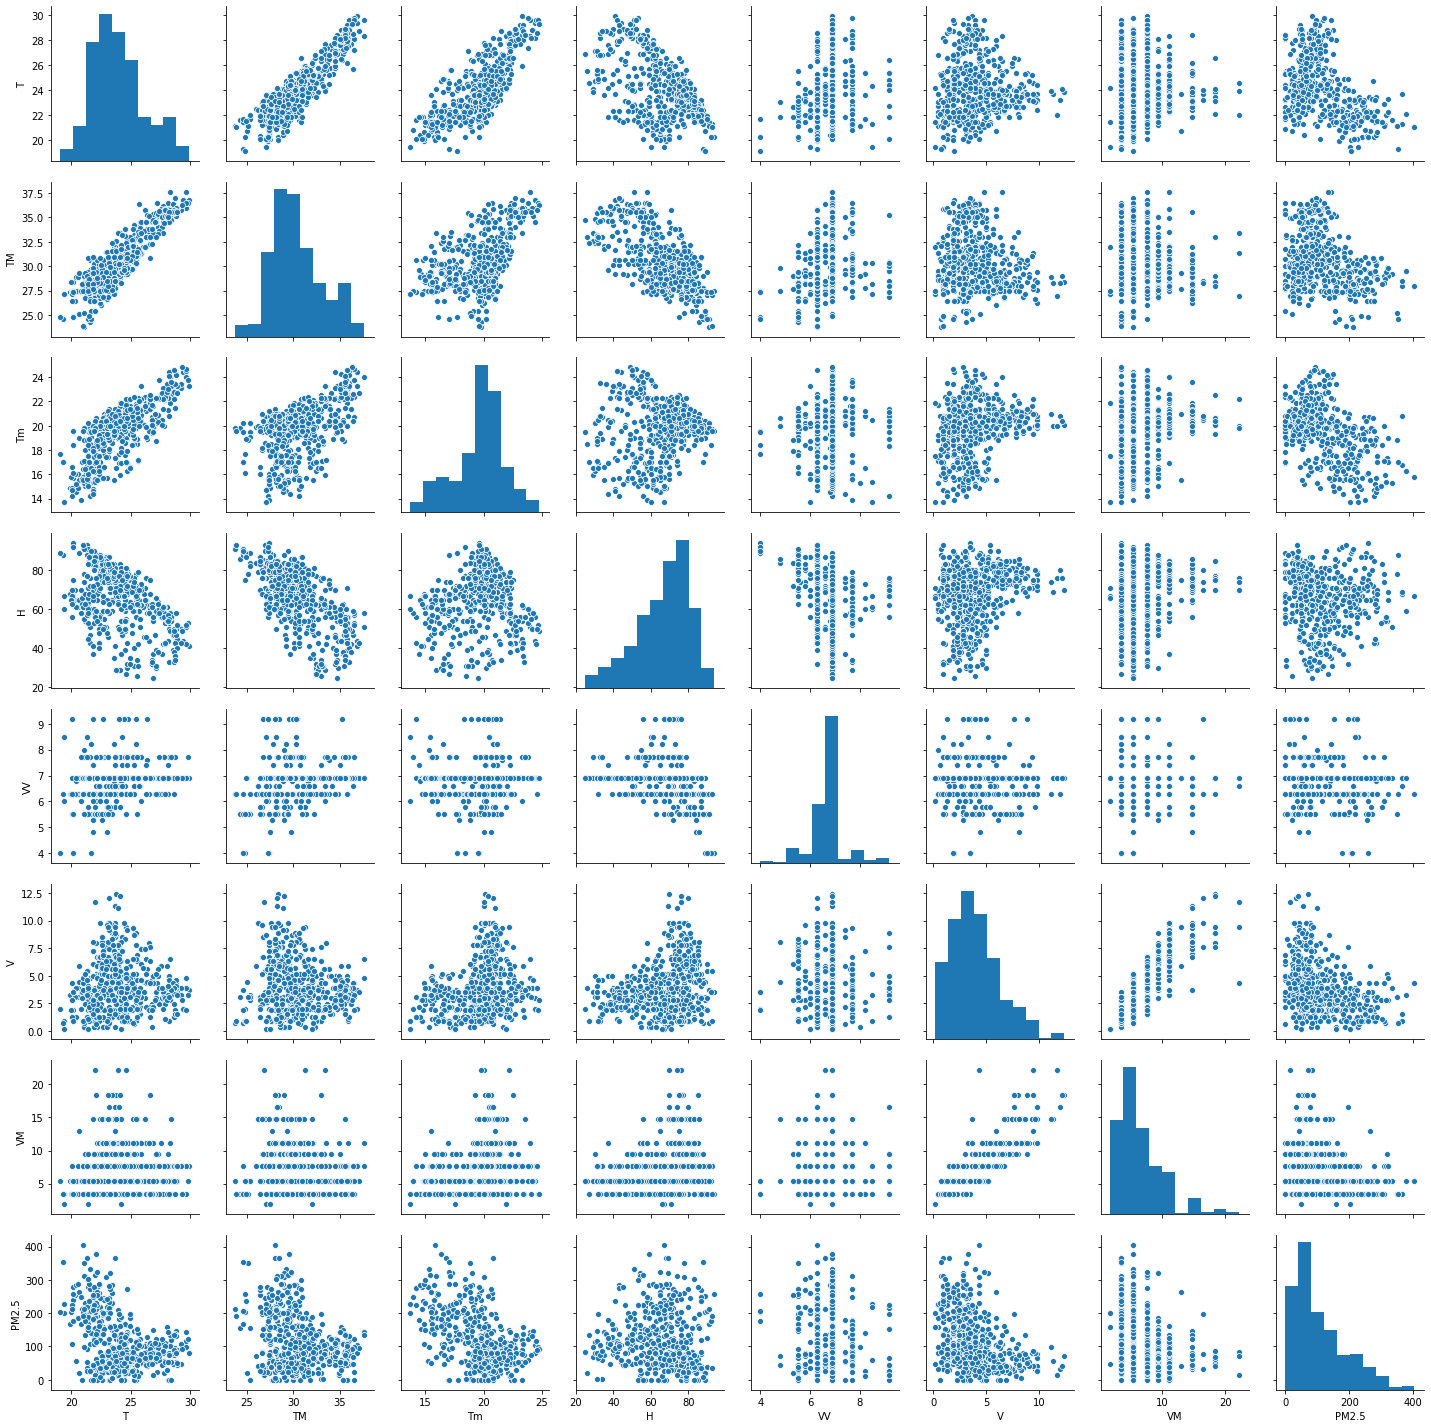

In [44]:
sns.pairplot(Final_DF)

In [45]:
Final_DF.corr()

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1.000000,0.885307,0.753131,-0.490295,0.267098,0.027025,0.028896,-0.390928
TM,0.885307,1.000000,0.485695,-0.668271,0.253771,-0.137693,-0.095588,-0.232051
Tm,0.753131,0.485695,1.000000,0.116660,0.042062,0.267700,0.246828,-0.505100
H,-0.490295,-0.668271,0.116660,1.000000,-0.299179,0.279534,0.256972,-0.135144
VV,0.267098,0.253771,0.042062,-0.299179,1.000000,-0.006665,-0.028797,-0.113367
V,0.027025,-0.137693,0.267700,0.279534,-0.006665,1.000000,0.843794,-0.386305
VM,0.028896,-0.095588,0.246828,0.256972,-0.028797,0.843794,1.000000,-0.342619
PM2.5,-0.390928,-0.232051,-0.505100,-0.135144,-0.113367,-0.386305,-0.342619,1.000000


In [202]:
data2=Final_DF.corr()
data2.style.background_gradient(cmap='RdYlGn')

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1,0.885307,0.753131,-0.490295,0.267098,0.0270253,0.0288961,-0.390928
TM,0.885307,1,0.485695,-0.668271,0.253771,-0.137693,-0.0955884,-0.232051
Tm,0.753131,0.485695,1,0.11666,0.0420617,0.2677,0.246828,-0.5051
H,-0.490295,-0.668271,0.11666,1,-0.299179,0.279534,0.256972,-0.135144
VV,0.267098,0.253771,0.0420617,-0.299179,1,-0.00666512,-0.0287967,-0.113367
V,0.0270253,-0.137693,0.2677,0.279534,-0.00666512,1,0.843794,-0.386305
VM,0.0288961,-0.0955884,0.246828,0.256972,-0.0287967,0.843794,1,-0.342619
PM2.5,-0.390928,-0.232051,-0.5051,-0.135144,-0.113367,-0.386305,-0.342619,1


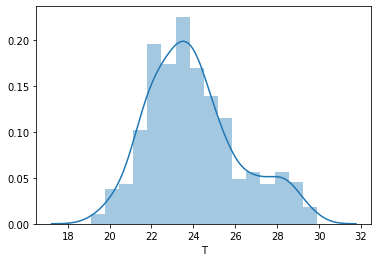

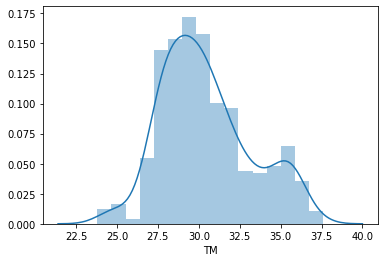

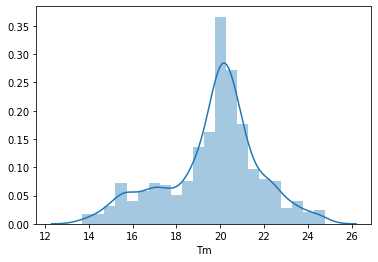

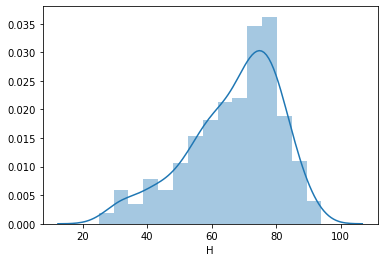

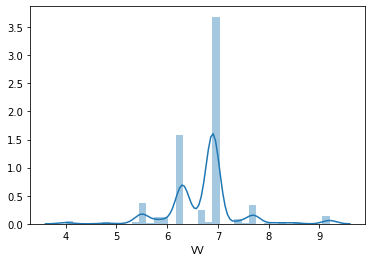

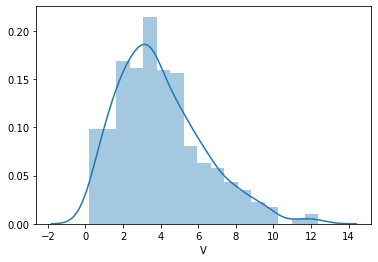

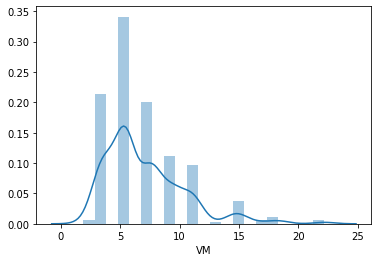

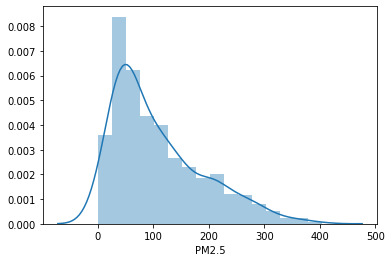

In [95]:
for i in Final_DF.columns:
    sns.distplot(Final_DF[i])
    plt.show()

In [203]:
## Model Building

In [46]:
X=Final_DF.drop('PM2.5',axis=1)

In [47]:
X.head()

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4


In [48]:
Y=Final_DF['PM2.5']

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.15,random_state=0)
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=250)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.6111717344114616


In [89]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=250)
et.fit(x_train,y_train)
y_pred=et.predict(X)
r2=r2_score(Y,y_pred)
print(r2)

0.9393489312050192


In [51]:
print('a1=',reg.coef_)
print('a0=',reg.intercept_)

a1= [-21.10093153  -1.14974417   2.98164067  -2.04123931  -7.41119919
  -9.69158006  -0.57635925]
a0= 819.0155770953687


In [66]:
y_pred=reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.44956235107810594


In [77]:
full_pred=reg.predict(X)

In [62]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X,Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [63]:
score.mean()

0.25892402397533315

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
full_pred=rf.predict(X)

In [70]:
from xgboost import XGBRegressor

In [71]:
xg=RandomForestRegressor(n_estimators=10)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.48185116321590726


In [133]:
from sklearn.neighbors import KNeighborsRegressor

In [134]:
kn=RandomForestRegressor(n_estimators=10)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.5452933548125687


In [135]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=250)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.6010039970796524


In [183]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [199]:
NNT_model = Sequential()

# The Input Layer :
NNT_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NNT_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNT_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NNT_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NNT_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NNT_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NNT_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_92 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_93 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_94 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 129       
Total params: 132,865
Trainable params: 132,865
Non-trainable params: 0
_________________________________________________________________


In [200]:
# Fitting the ANN to the Training set
model_history=NNT_model.fit(x_train, y_train, epochs=700)

Epoch 1/700
469/469 [==============================] - 0s 1ms/step - loss: 98.3582 - mean_absolute_error: 98.3582
Epoch 2/700
469/469 [==============================] - 0s 198us/step - loss: 72.2269 - mean_absolute_error: 72.2269
Epoch 3/700
469/469 [==============================] - 0s 198us/step - loss: 68.8653 - mean_absolute_error: 68.8653
Epoch 4/700
469/469 [==============================] - 0s 192us/step - loss: 67.3295 - mean_absolute_error: 67.3295
Epoch 5/700
469/469 [==============================] - 0s 217us/step - loss: 67.9896 - mean_absolute_error: 67.9896
Epoch 6/700
469/469 [==============================] - 0s 207us/step - loss: 65.9733 - mean_absolute_error: 65.9733
Epoch 7/700
469/469 [==============================] - 0s 192us/step - loss: 65.4296 - mean_absolute_error: 65.4296
Epoch 8/700
469/469 [==============================] - 0s 215us/step - loss: 64.7782 - mean_absolute_error: 64.7782
Epoch 9/700
469/469 [==============================] - 0s 202us/step - los

469/469 [==============================] - 0s 190us/step - loss: 48.0116 - mean_absolute_error: 48.0116
Epoch 141/700
469/469 [==============================] - 0s 183us/step - loss: 47.7031 - mean_absolute_error: 47.7031
Epoch 142/700
469/469 [==============================] - 0s 192us/step - loss: 46.8203 - mean_absolute_error: 46.8203
Epoch 143/700
469/469 [==============================] - 0s 198us/step - loss: 48.1638 - mean_absolute_error: 48.1638
Epoch 144/700
469/469 [==============================] - 0s 185us/step - loss: 47.0334 - mean_absolute_error: 47.0334
Epoch 145/700
469/469 [==============================] - 0s 196us/step - loss: 51.2283 - mean_absolute_error: 51.2283
Epoch 146/700
469/469 [==============================] - 0s 202us/step - loss: 47.9720 - mean_absolute_error: 47.9721
Epoch 147/700
469/469 [==============================] - 0s 183us/step - loss: 47.9547 - mean_absolute_error: 47.9547
Epoch 148/700
469/469 [==============================] - 0s 202us/step

469/469 [==============================] - 0s 213us/step - loss: 46.1424 - mean_absolute_error: 46.1424
Epoch 279/700
469/469 [==============================] - 0s 226us/step - loss: 44.5415 - mean_absolute_error: 44.5415
Epoch 280/700
469/469 [==============================] - 0s 219us/step - loss: 46.6211 - mean_absolute_error: 46.6211
Epoch 281/700
469/469 [==============================] - 0s 211us/step - loss: 45.5014 - mean_absolute_error: 45.5014
Epoch 282/700
469/469 [==============================] - 0s 202us/step - loss: 44.6379 - mean_absolute_error: 44.6379
Epoch 283/700
469/469 [==============================] - 0s 215us/step - loss: 44.9261 - mean_absolute_error: 44.9261
Epoch 284/700
469/469 [==============================] - 0s 222us/step - loss: 44.2044 - mean_absolute_error: 44.2044
Epoch 285/700
469/469 [==============================] - 0s 215us/step - loss: 44.6587 - mean_absolute_error: 44.6587
Epoch 286/700
469/469 [==============================] - 0s 205us/step

469/469 [==============================] - 0s 205us/step - loss: 44.9496 - mean_absolute_error: 44.9496
Epoch 417/700
469/469 [==============================] - 0s 194us/step - loss: 43.6335 - mean_absolute_error: 43.6335
Epoch 418/700
469/469 [==============================] - 0s 188us/step - loss: 43.8908 - mean_absolute_error: 43.8908
Epoch 419/700
469/469 [==============================] - 0s 200us/step - loss: 43.6564 - mean_absolute_error: 43.6564
Epoch 420/700
469/469 [==============================] - 0s 200us/step - loss: 44.0500 - mean_absolute_error: 44.0500
Epoch 421/700
469/469 [==============================] - 0s 207us/step - loss: 42.9320 - mean_absolute_error: 42.9320
Epoch 422/700
469/469 [==============================] - 0s 200us/step - loss: 41.9625 - mean_absolute_error: 41.9625
Epoch 423/700
469/469 [==============================] - 0s 194us/step - loss: 44.3738 - mean_absolute_error: 44.3738
Epoch 424/700
469/469 [==============================] - 0s 194us/step

469/469 [==============================] - 0s 198us/step - loss: 39.2177 - mean_absolute_error: 39.2177
Epoch 555/700
469/469 [==============================] - 0s 188us/step - loss: 38.5886 - mean_absolute_error: 38.5886
Epoch 556/700
469/469 [==============================] - 0s 188us/step - loss: 39.7370 - mean_absolute_error: 39.7370
Epoch 557/700
469/469 [==============================] - 0s 188us/step - loss: 39.5828 - mean_absolute_error: 39.5828
Epoch 558/700
469/469 [==============================] - 0s 194us/step - loss: 40.8134 - mean_absolute_error: 40.8134
Epoch 559/700
469/469 [==============================] - 0s 207us/step - loss: 39.0510 - mean_absolute_error: 39.0510
Epoch 560/700
469/469 [==============================] - 0s 185us/step - loss: 39.2377 - mean_absolute_error: 39.2377
Epoch 561/700
469/469 [==============================] - 0s 190us/step - loss: 39.6258 - mean_absolute_error: 39.6258
Epoch 562/700
469/469 [==============================] - 0s 190us/step

469/469 [==============================] - 0s 222us/step - loss: 37.4175 - mean_absolute_error: 37.4175
Epoch 693/700
469/469 [==============================] - 0s 185us/step - loss: 33.6397 - mean_absolute_error: 33.6397
Epoch 694/700
469/469 [==============================] - 0s 188us/step - loss: 34.6513 - mean_absolute_error: 34.6513
Epoch 695/700
469/469 [==============================] - 0s 211us/step - loss: 34.3540 - mean_absolute_error: 34.3540
Epoch 696/700
469/469 [==============================] - 0s 183us/step - loss: 35.4559 - mean_absolute_error: 35.4559
Epoch 697/700
469/469 [==============================] - 0s 198us/step - loss: 38.6805 - mean_absolute_error: 38.6805
Epoch 698/700
469/469 [==============================] - 0s 185us/step - loss: 35.6207 - mean_absolute_error: 35.6207
Epoch 699/700
469/469 [==============================] - 0s 202us/step - loss: 35.7705 - mean_absolute_error: 35.7705
Epoch 700/700
469/469 [==============================] - 0s 205us/step

In [201]:
prediction=NNT_model.predict(x_test)
r2=r2_score(y_test,prediction)
print(r2)

0.4403759418172427


In [68]:
rf=RandomForestRegressor(n_estimators=350)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.6122951115638807


## The Highest Accuracy is obtained by using the Random Forest Algorithm i.e. 61%